Written by Mink Spronk (GitHub: Minko1998) for SimpleText @ CLEF 2022

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("simpletext_task2_train.csv")
df.head()
df_without_dups = df.drop_duplicates(subset = ['source_snt'])

In [ ]:
text = df_without_dups.source_snt.to_list()
word_count = {}

for line in text:
    line = line.split()
    for word in line:
        word.strip()
        if word not in word_count:
            word_count[word] = 1
        else:
            word_count[word] += 1
word_count = dict(sorted(word_count.items(), key=lambda item: item[1], reverse = True))
word_count

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
import spacy
sp = spacy.load('en_core_web_sm')


pos_score = {}
for i, line in enumerate(df_without_dups.source_snt):
    pos_line = sp(line)
    line = line.split()
    
    per_line.append([])
    for j, word in enumerate(line):
        word.strip()
        pos_word = pos_line[j].pos_
        
        if word not in pos_score:
            pos_score[word] = 0
        
        # Nouns are considered most complicated in general
        if pos_word == "NOUN":
            pass
        # Followed by verbs
        if pos_word == "VERB":
            pos_score[word] += .5
        # Ending with adjectives
        if pos_word == "ADJ":
            pos_score[word] += 1
        else:
            pos_score[word] += 2

# adjusting for the times each word is used
for word in pos_score:
    pos_score[word] = pos_score[word] // word_count[word]

In [ ]:
from collections import Counter

final_score = Counter(pos_score) + Counter(word_count)
final_score


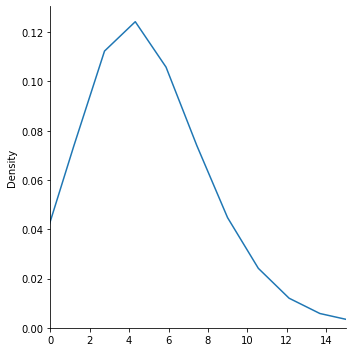

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.displot(final_score, kind = 'kde')
ax.set(xlim=(0, 15))
plt.show()

In [ ]:
with open('UAms-2-AR.json', w) as f:
    f.write(results)